In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib
%matplotlib inline

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
data_dir = './dataset/2_class'

In [4]:
data_root = pathlib.Path(data_dir)

In [5]:
data_root

PosixPath('dataset/2_class')

In [6]:
for item in data_root.iterdir():
    print(item)

dataset/2_class/.DS_Store
dataset/2_class/lake
dataset/2_class/airplane


In [7]:
all_image_path = list(data_root.glob('*/*'))

In [8]:
len(all_image_path)

1400

In [9]:
all_image_path[-2:]

[PosixPath('dataset/2_class/airplane/airplane_074.jpg'),
 PosixPath('dataset/2_class/airplane/airplane_060.jpg')]

In [10]:
all_image_path = [str(path) for path in all_image_path]

In [11]:
all_image_path[10:16]

['dataset/2_class/lake/lake_418.jpg',
 'dataset/2_class/lake/lake_430.jpg',
 'dataset/2_class/lake/lake_356.jpg',
 'dataset/2_class/lake/lake_342.jpg',
 'dataset/2_class/lake/lake_424.jpg',
 'dataset/2_class/lake/lake_395.jpg']

In [12]:
import random

In [13]:
random.shuffle(all_image_path)

In [14]:
all_image_path[10:12]

['dataset/2_class/airplane/airplane_091.jpg',
 'dataset/2_class/lake/lake_517.jpg']

In [15]:
image_count = len(all_image_path)

In [16]:
image_count

1400

In [17]:
label_names = sorted(item.name for item in data_root.glob("*/"))
label_names

['.DS_Store', 'airplane', 'lake']

In [18]:
label_to_index = dict((name,index) for index,name in enumerate(label_names))

In [19]:
label_to_index

{'.DS_Store': 0, 'airplane': 1, 'lake': 2}

In [20]:
all_image_label = []

In [21]:
pathlib.Path('dataset/2_class/lake/lake_060.jpg').parent.name

'lake'

In [22]:
all_image_label = [label_to_index[pathlib.Path(p).parent.name] for p in all_image_path]

In [23]:
all_image_label[20:30]

[2, 1, 1, 1, 1, 1, 1, 2, 1, 1]

In [24]:
all_image_path[20:30]

['dataset/2_class/lake/lake_318.jpg',
 'dataset/2_class/airplane/airplane_370.jpg',
 'dataset/2_class/airplane/airplane_656.jpg',
 'dataset/2_class/airplane/airplane_384.jpg',
 'dataset/2_class/airplane/airplane_207.jpg',
 'dataset/2_class/airplane/airplane_619.jpg',
 'dataset/2_class/airplane/airplane_335.jpg',
 'dataset/2_class/lake/lake_028.jpg',
 'dataset/2_class/airplane/airplane_578.jpg',
 'dataset/2_class/airplane/airplane_064.jpg']

In [25]:
import IPython.display as display

In [26]:
index_to_label = dict((v,k) for k,v in label_to_index.items())
index_to_label

{0: '.DS_Store', 1: 'airplane', 2: 'lake'}

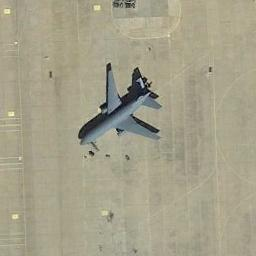

airplane


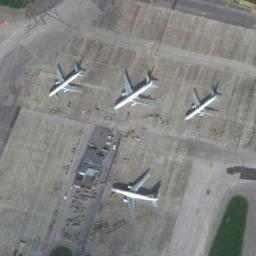

airplane


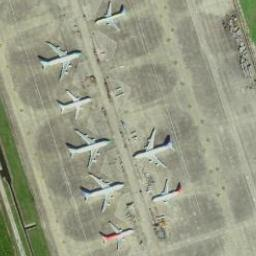

airplane


In [27]:
for n in range(3):
    image_index = random.choice(range(len(all_image_path)))
    display.display(display.Image(all_image_path[image_index]))
    print(index_to_label[all_image_label[image_index]])

In [28]:
img_raw = tf.io.read_file(all_image_path[1])

In [29]:
img_tensor = tf.image.decode_image(img_raw)
img_tensor.dtype

tf.uint8

In [30]:
img_tensor = tf.cast(img_tensor,tf.float32)

In [31]:
img_tensor = img_tensor/255
img_tensor.numpy().max()

1.0

In [32]:
def load_preprocess_image(path):
    img_raw = tf.io.read_file(path)
    img_tensor =tf.image.decode_jpeg(img_raw,channels=3)
    img_tensor = tf.image.resize(img_tensor,[256,256])
    img_tensor = tf.cast(img_tensor,tf.float32)
    img  = img_tensor/255
    return img 

In [33]:
img_path  = all_image_path[100]

In [34]:
img = load_preprocess_image(img_path)

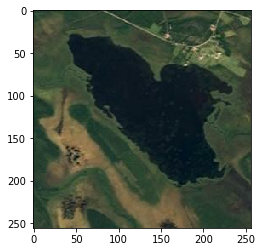

In [35]:
plt.imshow(img)

In [36]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_path)

In [37]:
image_dataset = path_ds.map(load_preprocess_image)

In [38]:
label_ds = tf.data.Dataset.from_tensor_slices(all_image_label)

In [39]:
for label in label_ds.take(10):
    print(label.numpy())

2
1
2
2
2
2
1
1
1
2


In [40]:
for img in image_dataset.take(2):
    print(img)

tf.Tensor(
[[[0.7607843  0.7058824  0.6039216 ]
  [0.69411767 0.6392157  0.5372549 ]
  [0.6666667  0.6039216  0.5058824 ]
  ...
  [0.96862745 0.8666667  0.72156864]
  [0.96862745 0.8666667  0.72156864]
  [0.9647059  0.8627451  0.7176471 ]]

 [[0.7176471  0.6627451  0.56078434]
  [0.63529414 0.5803922  0.47843137]
  [0.6313726  0.5686275  0.47058824]
  ...
  [0.96862745 0.8666667  0.72156864]
  [0.9764706  0.8745098  0.7294118 ]
  [0.972549   0.87058824 0.7254902 ]]

 [[0.654902   0.5921569  0.49411765]
  [0.6        0.5372549  0.4392157 ]
  [0.6117647  0.5411765  0.45490196]
  ...
  [0.94509804 0.84313726 0.69803923]
  [0.9607843  0.85882354 0.7137255 ]
  [0.972549   0.87058824 0.7254902 ]]

 ...

 [[0.7411765  0.6156863  0.5176471 ]
  [0.7411765  0.6156863  0.5176471 ]
  [0.7372549  0.6117647  0.5137255 ]
  ...
  [0.7764706  0.6901961  0.6       ]
  [0.7529412  0.6666667  0.5764706 ]
  [0.7137255  0.627451   0.5372549 ]]

 [[0.7411765  0.6156863  0.5176471 ]
  [0.7372549  0.6117647  0

In [41]:
image_dataset

<MapDataset shapes: (256, 256, 3), types: tf.float32>

In [42]:
dataset = tf.data.Dataset.zip((image_dataset,label_ds))

In [43]:
dataset

<ZipDataset shapes: ((256, 256, 3), ()), types: (tf.float32, tf.int32)>

In [44]:
test_count = int(image_count*0.2)
train_count = image_count -test_count


In [45]:
train_dataset  = dataset.skip(test_count)

In [46]:
train_dataset

<SkipDataset shapes: ((256, 256, 3), ()), types: (tf.float32, tf.int32)>

In [47]:
test_dataset = dataset.take(test_count)

In [48]:
BATCH_SIZE = 32

In [49]:
train_dataset =train_dataset.shuffle(buffer_size=train_count).repeat().batch(BATCH_SIZE)

In [50]:
test_dataset  = test_dataset.batch(BATCH_SIZE).repeat()

# 建立模型

In [72]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),
             input_shape=(256,256,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.)
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
# model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
# model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D())
# model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu'))
# model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D())
# model.add(tf.keras.layers.Conv2D(512,(3,3),activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D())
# model.add(tf.keras.layers.Conv2D(512,(3,3),activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D())
# model.add(tf.keras.layers.Conv2D(1024,(3,3),activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling2D())
# model.add(tf.keras.layers.Dense(1024,activation='relu'))
# model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [73]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 252, 252, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
global_average_pooling2d_4 ( (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 38,785
Trainable params: 38,785
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics =[ 'acc'])

In [75]:
step_epoch = train_count//BATCH_SIZE
validation_steps = test_count//BATCH_SIZE

In [ ]:
model.fit(train_dataset,epochs=10,steps_per_epoch=step_epoch,
         validation_data=test_dataset,validation_steps=validation_steps)

Train for 35 steps, validate for 8 steps
Epoch 1/10
27/35 [======================>.......] - ETA: 34s - loss: -2.2918 - acc: 0.4838